Details of Dataset :

All the code files report is updated in github :https://github.com/suprithakulkarni3113-rgb/Crime_Dataanalysis_Stats.git

Dataset name in github : estimated_crimes_1979_2023.csv - load this file to run the notebook

national_data.csv , state_data.csv, state_data_cleaned.csv are generated through the code

# 1. Install Required packages

In [1]:

options(warn = -1)
install.packages("dplyr")
install.packages("ggplot2")
install.packages("car")
install.packages("boot")
install.packages("tidyr")
install.packages("tidyverse")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




# 2.Load libraries

In [2]:
library(dplyr)
library(ggplot2)
library(car)
library(boot)
library(tidyr)
library(tidyverse)
library(e1071)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘boot’


The following object is masked from ‘package:car’:

    logit


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ readr     2.1.6
✔ lubridate 1.9.4     ✔ stringr   1.6.0
✔ purrr     1.2.0     ✔ tibble    3.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ car::recode()   masks dplyr::recode()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘e1071’


The follo

# 3. Load the Dataset

In [4]:
crime_data <- read.csv("estimated_crimes_1979_2023.csv")

head(crime_data)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1979,,,220099000,1208030,21460,76390,,480700,629480,11041500,3327700,6601000,1112800,
2,1979,AK,Alaska,406000,1994,54,292,,445,1203,23193,5616,15076,2501,
3,1979,AL,Alabama,3769000,15578,496,1037,,4127,9918,144372,48517,83791,12064,
4,1979,AR,Arkansas,2180000,7984,198,595,,1626,5565,70949,21457,45267,4225,
5,1979,AZ,Arizona,2450000,14528,219,1120,,4305,8884,177977,48916,116976,12085,
6,1979,CA,California,22696000,184087,2952,12239,,75767,93129,1511021,496310,847148,167563,


# 4. Overview of Dataset Attributes

In [5]:

colnames(crime_data)


[1] "year"                "state_abbr"          "state_name"         
 [4] "population"          "violent_crime"       "homicide"           
 [7] "rape_legacy"         "rape_revised"        "robbery"            
[10] "aggravated_assault"  "property_crime"      "burglary"           
[13] "larceny"             "motor_vehicle_theft" "caveats"

The description of each attribute:

1. **year** – The year the data belongs to.
2. **state_abbr** – Short code for each U.S. state (like CA, TX, NY).
3. **state_name** – Full name of the U.S. state.
4. **population** – Estimated number of people living in that state for that year.
5. **violent_crime** – Total number of serious crimes involving violence (homicide, rape, robbery, assault).
6. **homicide** – Number of people intentionally killed.
7. **rape_legacy** – Number of rape cases counted using the old FBI definition.
8. **rape_revised** – Number of rape cases counted using the newer definition (used after 2013).
9. **robbery** – Number of thefts that involved force or threats.
10. **aggravated_assault** – Number of attacks meant to cause serious injury.
11. **property_crime** – Total number of crimes against property (burglary, larceny, vehicle theft).
12. **burglary** – Break-ins to steal something or commit a crime.
13. **larceny** – Theft of personal items without using force.
14. **motor_vehicle_theft** – Stealing or trying to steal a vehicle.
15. **caveats** – Notes explaining special cases or issues in the data (like definition changes or missing reports).


# 5. Handling Data Type Discrepancies



* **Convert year into a whole number:** So it can be used correctly for timelines and trends.
* **Clean up number fields:** Take out commas and turn all population and crime counts into real numbers.
* **Make state columns text:** So state names and abbreviations are handled as plain words, not numbers.


In [6]:
crime_data <- crime_data %>%
  mutate(year = as.integer(year))

In [7]:


numeric_columns <- c(
  "population", "violent_crime", "homicide", "rape_legacy",
  "rape_revised", "robbery", "aggravated_assault",
  "property_crime", "burglary", "larceny", "motor_vehicle_theft"
)

crime_data <- crime_data %>%
  mutate(across(all_of(numeric_columns), ~ as.numeric(gsub(",", "", .))))

In [8]:


crime_data <- crime_data %>%
  mutate(
    state_abbr = as.character(state_abbr),
    state_name = as.character(state_name)
  )


In [9]:
str(crime_data)

'data.frame':	2336 obs. of  15 variables:
 $ year               : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ state_abbr         : chr  "" "AK" "AL" "AR" ...
 $ state_name         : chr  "" "Alaska" "Alabama" "Arkansas" ...
 $ population         : num  2.20e+08 4.06e+05 3.77e+06 2.18e+06 2.45e+06 ...
 $ violent_crime      : num  1208030 1994 15578 7984 14528 ...
 $ homicide           : num  21460 54 496 198 219 ...
 $ rape_legacy        : num  76390 292 1037 595 1120 ...
 $ rape_revised       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ robbery            : num  480700 445 4127 1626 4305 ...
 $ aggravated_assault : num  629480 1203 9918 5565 8884 ...
 $ property_crime     : num  11041500 23193 144372 70949 177977 ...
 $ burglary           : num  3327700 5616 48517 21457 48916 ...
 $ larceny            : num  6601000 15076 83791 45267 116976 ...
 $ motor_vehicle_theft: num  1112800 2501 12064 4225 12085 ...
 $ caveats            : chr  "" "" "" "" ...


# 6. Handling Missing Values

In [10]:


missing_summary <- colSums(is.na(crime_data))
missing_percentage <- colMeans(is.na(crime_data)) * 100

In [11]:
print("Summary of Missing Values :")
print(missing_summary)

print("Percentage of Missing Values:")
print(missing_percentage)

[1] "Summary of Missing Values :"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft             caveats 
                  0                   0                   0 
[1] "Percentage of Missing Values:"
               year          state_abbr          state_name          population 
            0.00000             0.00000             0.00000             0.00000 
      violent_crime            homicide         rape_legacy        rape_revised 
            0.00000             0.00000            15.41096            75.68493

### Analyze Attribute Caveats

In [12]:


unique_caveats <- unique(crime_data$caveats)

print("Unique values in 'caveats':")
print(unique_caveats)

[1] "Unique values in 'caveats':"
 [1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [2] "The state UCR Program was unable to provide 1985-2013 forcible rape figures in accordance with national UCR Program guidelines.  The rape totals were estimated using national rates per 100,000 inhabitants within the eight population groups and assigning the forcible rape volumes proportionally to the state."                                                                  

In [13]:


crime_data$caveats[crime_data$caveats == ""] <- NA

missing_caveats_count <- sum(is.na(crime_data$caveats))
print(paste("No. of missing values in 'caveats' after replacing empty strings-", missing_caveats_count))

[1] "No. of missing values in 'caveats' after replacing empty strings- 2265"


In [14]:
# Checking the proportion of empty values

empty_caveats_percentage <- mean(is.na(crime_data$caveats)) * 100
print(paste("Percentage of missing/empty values in 'caveats':", round(empty_caveats_percentage, 2), "%"))

[1] "Percentage of missing/empty values in 'caveats': 96.96 %"


In [15]:
# Dropping the column if it has  irrelevant data

if (empty_caveats_percentage > 90) {
  crime_data <- crime_data %>% select(-caveats)
  print("'caveats' column dropped due to irrelevance.")
} else {
  print("'caveats' column retained for reference.")
}

[1] "'caveats' column dropped due to irrelevance."


### Handling all empty strings in the Dataset

In [16]:
# Replace all empty strings in the dataset with NA

crime_data[crime_data == ""] <- NA

missing_summary <- colSums(is.na(crime_data))
print("Missing values after replacing empty strings:")
print(missing_summary)

[1] "Missing values after replacing empty strings:"
               year          state_abbr          state_name          population 
                  0                  41                  90                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 


# 7. Seperating the National and State related Crime Data

If the state name is missing, that row represents national-level data. So it's helpful to split this data , one part for national trends over time, and another part for state-by-state analysis.

In [17]:
# Identifying nation-level records

national_data <- crime_data[(
  is.na(crime_data$state_name) |
  crime_data$state_name == "" |
  crime_data$state_name == "United States Total"
) & is.na(crime_data$state_abbr), ]

In [18]:
# Remove these records from the original dataset

state_data <- crime_data[!(
  (is.na(crime_data$state_name) |
   crime_data$state_name == "" |
   crime_data$state_name == "United States Total") &
  is.na(crime_data$state_abbr)
), ]

In [19]:
# Replace state_abbr and state_name in national_data with 'USA'

national_data$state_abbr <- "USA"
national_data$state_name <- "USA"

head(national_data[c("state_abbr", "state_name")])

,state_abbr,state_name
,<chr>,<chr>
1,USA,USA
53,USA,USA
105,USA,USA
157,USA,USA
209,USA,USA
261,USA,USA


In [20]:
write.csv(national_data, "national_data.csv", row.names = FALSE)
write.csv(state_data, "state_data.csv", row.names = FALSE)

In [21]:
print(paste("Nation-level records separated:", nrow(national_data)))
print(paste("Remaining state-level records:", nrow(state_data)))

[1] "Nation-level records separated: 41"
[1] "Remaining state-level records: 2295"


# 8. Data Cleaning

In [22]:
# Check for missing values in the national dataset

missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)


[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                   3                  34 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
           0.000000            0.000000            0.000000            0.000000 
      violent_crime            homicide         rape_legacy        rape_revised 
           0.000000            0.000000            7.317073           82.926829 
  

Understanding more on rape legacy and rape revised attributes to handle missing values

Rape Legacy:
This uses the old definition of rape (before 2013). It only counted cases of forcible rape against women.

Rape Revised:
This uses the newer definition (after 2013). It counts rape cases for both men and women and includes any non-consensual penetration, even if no force was used.

Before 2013:
We use rape_legacy because rape_revised data won’t exist.

After 2013:
We use rape_revised because it has the updated, more complete definition.

Around 2013:
If rape_revised is available, use it as it gives a more accurate picture.

If both columns are populated for some records:

Prefer rape_revised for analysis, as it is more inclusive and reflects modern definitions.
Optionally, create a new column that prioritizes rape_revised and uses rape_legacy as a fallback.

In [23]:
# Create a unified column for rape counts

national_data$rape <- ifelse(!is.na(national_data$rape_revised),
                             national_data$rape_revised,
                             national_data$rape_legacy)


In [24]:
# Drop the 'rape_legacy' and 'rape_revised' columns

national_data <- national_data %>% select(-rape_legacy, -rape_revised)

head(national_data)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,rape
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,6601000,1112800,76390
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,7136900,1131700,82990
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,7194400,1087800,82500
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,7142500,1062400,78770
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,6712759,1007933,78918
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,6591874,1032165,84233


In [25]:
# Check for missing values in the national dataset

missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)

[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary             larceny motor_vehicle_theft 
                  0                   0                   0                   0 
               rape 
                  0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary   

In [26]:
head(state_data)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,292,NA,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,NA,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,NA,1626,5565,70949,21457,45267,4225
5,1979,AZ,Arizona,2450000,14528,219,1120,NA,4305,8884,177977,48916,116976,12085
6,1979,CA,California,22696000,184087,2952,12239,NA,75767,93129,1511021,496310,847148,167563
7,1979,CO,Colorado,2772000,14472,161,1472,NA,4353,8486,180984,49741,117898,13345


In [27]:
# Check for missing values in state_data

missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization

missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

print("Missing Values Summary in State Data:")
print(missing_summary)

# Filter columns with missing values

columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)


[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0           0.000000
state_abbr                   state_abbr              0           0.000000
state_name                   state_name             51           2.222222
population                   population              0           0.000000
violent_crime             violent_crime              0           0.000000
homicide                       homicide              0           0.000000
rape_legacy                 rape_legacy            357          15.555556
rape_revised               rape_revised           1734          75.555556
robbery                         robbery              0           0.000000
aggravated_assault   aggravated_assault              0           0.000000
property_crime           property_crime              0           0.000000
burglary                       burglary              0           0.0

In [28]:
# Create a mapping of state_abbr to state_name from existing data

state_mapping <- setNames(
  state_data$state_name[!is.na(state_data$state_name)],
  state_data$state_abbr[!is.na(state_data$state_name)]
)

# Fill missing state_name values using the mapping

state_data$state_name[is.na(state_data$state_name)] <- state_mapping[state_data$state_abbr[is.na(state_data$state_name)]]

missing_state_name_count <- sum(is.na(state_data$state_name))
print(paste("Remaining missing state_name values:", missing_state_name_count))


[1] "Remaining missing state_name values: 0"


In [29]:
# Merging the rape_legacy and rape_revised columns
# Create a unified column for rape counts

state_data$rape <- ifelse(!is.na(state_data$rape_revised),
                             state_data$rape_revised,
                             state_data$rape_legacy)

In [30]:
# Drop the 'rape_legacy' and 'rape_revised' columns
state_data <- state_data %>% select(-rape_legacy, -rape_revised)

# Verify the changes
head(state_data)

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,rape
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,15076,2501,292
3,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,83791,12064,1037
4,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,45267,4225,595
5,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,116976,12085,1120
6,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,847148,167563,12239
7,1979,CO,Colorado,2772000,14472,161,4353,8486,180984,49741,117898,13345,1472


In [31]:
# Check for missing values in state_data

missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization

missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

print("Missing Values Summary in State Data:")
print(missing_summary)

# Filter columns with missing values

columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)

[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0                  0
state_abbr                   state_abbr              0                  0
state_name                   state_name              0                  0
population                   population              0                  0
violent_crime             violent_crime              0                  0
homicide                       homicide              0                  0
robbery                         robbery              0                  0
aggravated_assault   aggravated_assault              0                  0
property_crime           property_crime              0                  0
burglary                       burglary              0                  0
larceny                         larceny              0                  0
motor_vehicle_theft motor_vehicle_theft              0              

In [32]:
# Remove leading and trailing spaces from 'state_name'

state_data$state_name <- trimws(state_data$state_name)

head(state_data$state_name)

[1] "Alaska"     "Alabama"    "Arkansas"   "Arizona"    "California"
[6] "Colorado"

In [33]:
write.csv(state_data, "state_data_cleaned.csv", row.names = FALSE)

# 9. Data Normalization

Normalization helps make crime data comparable across different states and years. By converting raw crime counts into rates per 100,000 people, we adjust for population size so that comparisons are fair and meaningful.

In [34]:
# Define columns to normalize

crime_columns <- c(
  'violent_crime', 'homicide', 'rape',
  'robbery', 'aggravated_assault', 'property_crime',
  'burglary', 'larceny', 'motor_vehicle_theft'
)

# Normalize national data

for (col in crime_columns) {
  national_data[[paste0(col, "_rate")]] <- (national_data[[col]] / national_data$population) * 100000
}

# Normalize state data

for (col in crime_columns) {
  state_data[[paste0(col, "_rate")]] <- (state_data[[col]] / state_data$population) * 100000
}

head(national_data)
head(state_data)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,⋯,76390,548.8576,9.750158,34.70711,218.4017,285.9986,5016.606,1511.911,2999.105,505.5907
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,⋯,82990,596.6383,10.224129,36.82728,251.0947,298.4922,5353.335,1684.141,3167.039,502.1982
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,⋯,82500,593.4743,9.814102,35.95308,258.3872,289.3243,5256.515,1647.174,3135.283,474.0577
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,⋯,78770,570.8213,9.069151,34.00176,238.7634,288.9869,5029.688,1487.971,3083.123,458.5943
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,⋯,78918,538.1224,8.258623,33.75565,216.6742,279.4339,4641.110,1338.733,2871.253,431.1238
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,⋯,84233,539.9269,7.926220,35.71845,205.6645,290.6177,4498.453,1265.530,2795.241,437.6828


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,⋯,292,491.1330,13.300493,71.92118,109.60591,296.3054,5712.562,1383.2512,3713.300,616.0099
3,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,⋯,1037,413.3192,13.159989,27.51393,109.49854,263.1467,3830.512,1287.2645,2223.163,320.0849
4,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,⋯,595,366.2385,9.082569,27.29358,74.58716,255.2752,3254.541,984.2661,2076.468,193.8073
5,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,⋯,1120,592.9796,8.938776,45.71429,175.71429,362.6122,7264.367,1996.5714,4774.531,493.2653
6,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,⋯,12239,811.0989,13.006697,53.92580,333.83416,410.3322,6657.653,2186.7730,3732.587,738.2931
7,1979,CO,Colorado,2772000,14472,161,4353,8486,180984,49741,⋯,1472,522.0779,5.808081,53.10245,157.03463,306.1328,6529.004,1794.4084,4253.175,481.4214


# 10. Statistical Analysis

In [35]:

print("Summary of National Data:")
summary(national_data)


print("Summary of State Data:")
summary(state_data)


[1] "Summary of National Data:"


      year       state_abbr         state_name          population       
 Min.   :1979   Length:41          Length:41          Min.   :220099000  
 1st Qu.:1989   Class :character   Class :character   1st Qu.:246819230  
 Median :1999   Mode  :character   Mode  :character   Median :272690813  
 Mean   :1999                                         Mean   :277167210  
 3rd Qu.:2009                                         3rd Qu.:307006550  
 Max.   :2023                                         Max.   :334914895  
 violent_crime        homicide        robbery       aggravated_assault
 Min.   :1153022   Min.   :14164   Min.   :217550   Min.   : 629480   
 1st Qu.:1284885   1st Qu.:16148   1st Qu.:401470   1st Qu.: 762009   
 Median :1390745   Median :18692   Median :447324   Median : 862220   
 Mean   :1442171   Mean   :18848   Mean   :461448   Mean   : 866262   
 3rd Qu.:1533887   3rd Qu.:21500   3rd Qu.:542968   3rd Qu.: 911740   
 Max.   :1932274   Max.   :24703   Max.   :687732   Max.

[1] "Summary of State Data:"


      year       state_abbr         state_name          population      
 Min.   :1979   Length:2295        Length:2295        Min.   :  406000  
 1st Qu.:1990   Class :character   Class :character   1st Qu.: 1397361  
 Median :2001   Mode  :character   Mode  :character   Median : 3721000  
 Mean   :2001                                         Mean   : 5524434  
 3rd Qu.:2012                                         3rd Qu.: 6494134  
 Max.   :2023                                         Max.   :39461588  
 violent_crime       homicide       robbery       aggravated_assault
 Min.   :   322   Min.   :   1   Min.   :    41   Min.   :   213    
 1st Qu.:  5099   1st Qu.:  52   1st Qu.:  1046   1st Qu.:  3348    
 Median : 14807   Median : 201   Median :  3771   Median :  9318    
 Mean   : 28029   Mean   : 368   Mean   :  8728   Mean   : 16941    
 3rd Qu.: 33019   3rd Qu.: 482   3rd Qu.:  8432   3rd Qu.: 20665    
 Max.   :345624   Max.   :4096   Max.   :130897   Max.   :198045    
 prope

# 11. Exploratory Data Analysis - National data

### Trend Analysis:

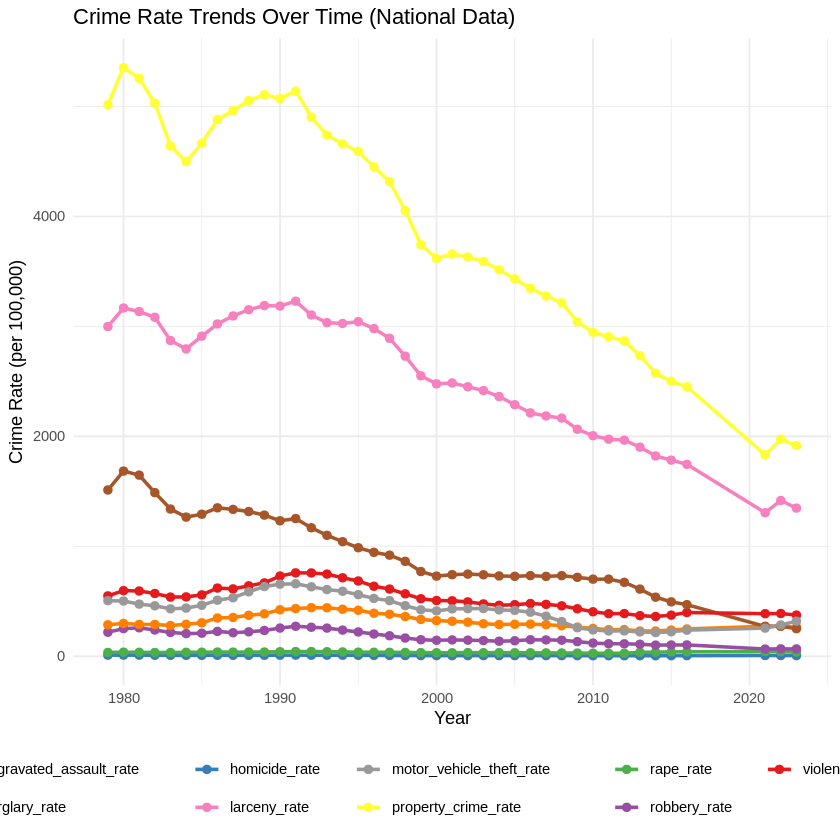

In [37]:
# Trend Analysis: Crime Rates Over Time
# Reshape data for easier plotting
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

# Define custom colors for crime types
crime_colors <- c(
  "violent_crime_rate" = "#E41A1C",
  "homicide_rate" = "#377EB8",
  "rape_rate" = "#4DAF4A",
  "robbery_rate" = "#984EA3",
  "aggravated_assault_rate" = "#FF7F00",
  "property_crime_rate" = "#FFFF33",
  "burglary_rate" = "#A65628",
  "larceny_rate" = "#F781BF",
  "motor_vehicle_theft_rate" = "#999999"
)

# Plot trends for all crime types with custom colors
ggplot(national_long, aes(x = year, y = crime_rate, color = crime_type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_color_manual(values = crime_colors) +
  ggtitle("Crime Rate Trends Over Time (National Data)") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(legend.title = element_blank(),
        legend.position = "bottom")


The graph shows how crime in the country has changed from the late 1970s to now. Most types of crime have gone down a lot since they were highest in the 1980s and 1990s. Property crimes, like theft and burglary, used to be the most common, but they have dropped, probably because of better security and policing. Violent crimes, like assault and robbery, were highest in the early 1990s but have also been decreasing steadily. Homicide rates have stayed low, with only small changes. Overall, the decrease in almost all types of crime suggests that better crime prevention, technology, and policies have made communities safer.

### Highest and Lowest crime rates for each crime type

In [38]:
# Find the year with the highest and lowest crime rates for each crime type

key_metrics <- lapply(crime_rate_columns, function(crime) {
  data.frame(
    Crime_Type = crime,
    Max_Year = national_data$year[which.max(national_data[[crime]])],
    Max_Value = max(national_data[[crime]], na.rm = TRUE),
    Min_Year = national_data$year[which.min(national_data[[crime]])],
    Min_Value = min(national_data[[crime]], na.rm = TRUE)
  )
})

# Combine results into a single data frame
key_metrics_df <- do.call(rbind, key_metrics)
print(key_metrics_df)

                Crime_Type Max_Year  Max_Value Min_Year   Min_Value
1       violent_crime_rate     1991  758.17710     2014  361.553854
2            homicide_rate     1980   10.22413     2014    4.441415
3                rape_rate     1992   42.76443     2011   27.014856
4             robbery_rate     1991  272.74383     2021   65.520881
5  aggravated_assault_rate     1992  441.89912     2014  229.248051
6      property_crime_rate     1980 5353.33455     2021 1832.318021
7            burglary_rate     1980 1684.14129     2023  250.679505
8             larceny_rate     1991 3229.08116     2021 1305.527727
9 motor_vehicle_theft_rate     1991  659.01948     2014  215.361261


Looking at crime trends over time, we can see clear highs and lows for different types of crime. Violent crime was highest in 1991 at 758 per 100,000 people and dropped to 362 in 2014. Homicides were highest in 1980 at 10.22 and fell to 4.44 in 2014. Rape peaked in 1992 at 42.76 and was lowest in 2011 at 27. Robbery was highest in 1991 at 272.74 and fell to 65.52 in 2021. Aggravated assault reached a maximum of 441.90 in 1992 and dropped to 229.25 in 2014.

For property crimes, the overall rate was highest in 1980 at 5353.33 and dropped to 1832.32 in 2021. Burglary peaked in 1980 at 1684.14 and was lowest in 2023 at 250.68. Larceny was highest in 1991 at 3229.08 and lowest in 2021 at 1305.53. Motor vehicle theft hit its peak in 1991 at 659.02 and fell to 215.36 in 2014.

### Correlation Analysis

                                       Crime_Type Correlation
violent_crime_rate             violent_crime_rate  -0.7862643
homicide_rate                       homicide_rate  -0.8517171
rape_rate                               rape_rate  -0.2046159
robbery_rate                         robbery_rate  -0.9226853
aggravated_assault_rate   aggravated_assault_rate  -0.5525863
property_crime_rate           property_crime_rate  -0.9689658
burglary_rate                       burglary_rate  -0.9674821
larceny_rate                         larceny_rate  -0.9437038
motor_vehicle_theft_rate motor_vehicle_theft_rate  -0.7973006


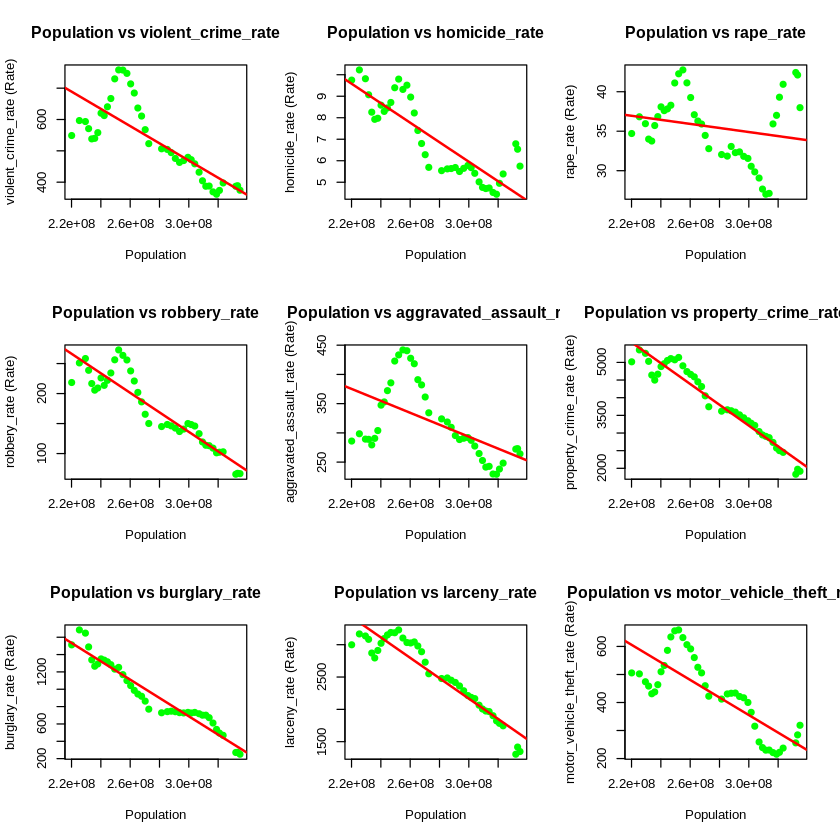

In [39]:
# Compute correlations between population and each crime rate and visualizes relationships.

correlations <- sapply(crime_rate_columns, function(crime) {
  cor(national_data$population, national_data[[crime]], use = "complete.obs")
})
correlations_df <- data.frame(Crime_Type = crime_rate_columns, Correlation = correlations)
print(correlations_df)

# Visualize relationships with scatter plots

par(mfrow = c(3, 3))
for (crime in crime_rate_columns) {
  plot(national_data$population, national_data[[crime]],
       main = paste("Population vs", crime),
       xlab = "Population",
       ylab = paste(crime, "(Rate)"),
       pch = 19, col = "green")
  abline(lm(national_data[[crime]] ~ national_data$population), col = "red", lwd = 2)
}
par(mfrow = c(1, 1))


The scatterplots with trend lines show that most crime rates have gone down over time. Property crimes like burglary, theft, and car theft have dropped the most, likely due to better security and technology. Violent crimes, such as robbery and aggravated assault, have also decreased, but not as sharply. Homicide rates have slowly gone down with little change, while rape rates vary more, possibly because of changes in reporting and awareness. Overall, the graphs show that crime in the country has been steadily decreasing, thanks to policies, social changes, and economic factors, showing that efforts to keep people safe are working.

### Distribution Analysis

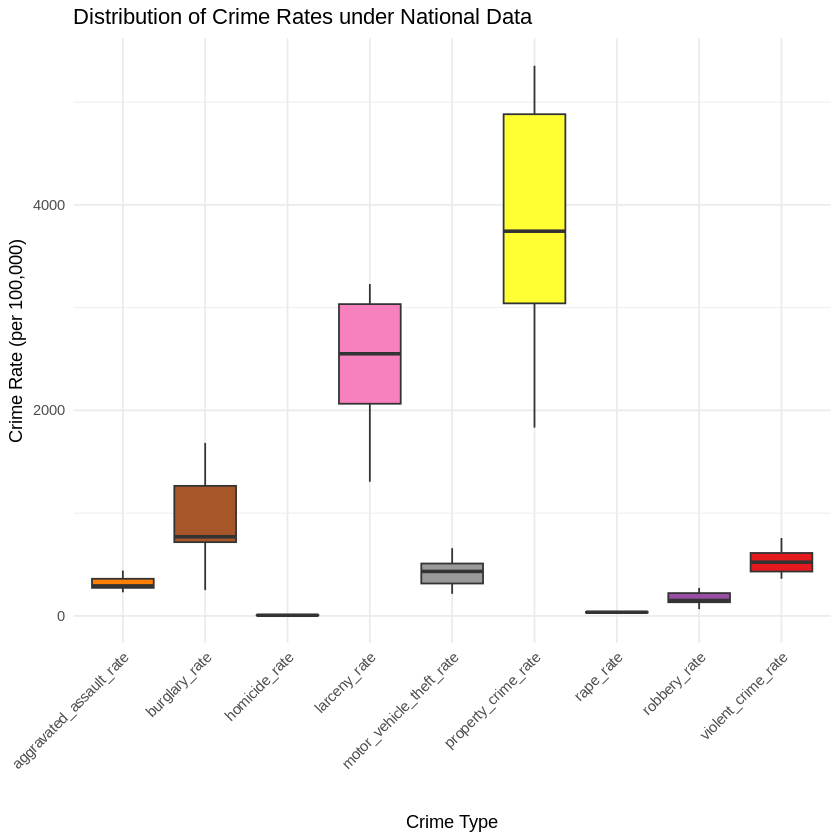

In [40]:
# Distribution Analysis - Boxplot with custom colors

# Reshape data if not already done
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

# Define custom colors
crime_colors <- c(
  "violent_crime_rate" = "#E41A1C",
  "homicide_rate" = "#377EB8",
  "rape_rate" = "#4DAF4A",
  "robbery_rate" = "#984EA3",
  "aggravated_assault_rate" = "#FF7F00",
  "property_crime_rate" = "#FFFF33",
  "burglary_rate" = "#A65628",
  "larceny_rate" = "#F781BF",
  "motor_vehicle_theft_rate" = "#999999"
)

# Boxplot with colors
ggplot(national_long, aes(x = crime_type, y = crime_rate, fill = crime_type)) +
  geom_boxplot() +
  scale_fill_manual(values = crime_colors) +
  ggtitle("Distribution of Crime Rates under National Data") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")  # Hide legend since colors already map to x-axis


The boxplot shows how different crime rates vary across the country. Property crimes and larceny have the highest typical rates and the most variation, shown by their wide ranges. Burglary and car theft also vary, but not as much. Violent crimes, like robbery and aggravated assault, have smaller typical rates and less variation over time. Homicide has the lowest rates and is the most consistent. Some crimes, especially property crimes and larceny, have outliers, meaning a few years had unusually high rates. Overall, property crimes have the biggest impact on overall crime trends, while violent crimes are generally more stable.

### Year-over-Year (YoY) Change Analysis

In [41]:
# List of crime rate columns

crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)

# Calculate Year-over-Year (YoY) changes

national_data_yoy <- national_data %>%
  mutate(across(all_of(crime_rate_columns), ~ . - lag(.), .names = "yoy_{.col}"))

# Find the years with the largest increases and decreases for each crime type

yoy_summary <- lapply(crime_rate_columns, function(crime) {
  yoy_values <- national_data_yoy[[paste0("yoy_", crime)]]
  valid_years <- national_data_yoy$year[!is.na(yoy_values)]
  valid_values <- yoy_values[!is.na(yoy_values)]

  data.frame(
    Crime_Type = crime,
    Max_Year = valid_years[which.max(valid_values)],
    Max_Change = max(valid_values),
    Min_Year = valid_years[which.min(valid_values)],
    Min_Change = min(valid_values)
  )
})

yoy_summary_df <- do.call(rbind, yoy_summary)

print(yoy_summary_df)


                Crime_Type Max_Year Max_Change Min_Year   Min_Change
1       violent_crime_rate     1990  62.714117     1996  -47.8275249
2            homicide_rate     2021   1.403052     1996   -0.8145398
3                rape_rate     2013   8.796991     2023   -4.1364093
4             robbery_rate     1980  32.692955     2021  -37.3829199
5  aggravated_assault_rate     1986  43.459584     1996  -27.2602978
6      property_crime_rate     1980 336.728383     2021 -619.2541802
7            burglary_rate     1980 172.230740     2021 -198.0174197
8             larceny_rate     1980 167.934461     2021 -439.9056089
9 motor_vehicle_theft_rate     1988  54.187229     2009  -56.2534639



Looking at year-to-year changes in crime rates, we can see clear patterns over time. Crime, especially property and violent crimes, went up a lot in the 1980s and early 1990s, peaking around 1980 and 1990. Then, in the mid-to-late 1990s, crime rates dropped significantly, likely due to better policing and social changes. In 2021, violent crimes rose again, probably affected by the disruptions from COVID-19. By 2022 and 2023, some crimes like property crimes and larceny continued to go down, showing that crime prevention is still improving. Overall, crime trends change over time and are influenced by both historical events and current situations.

### Proportion Analysis

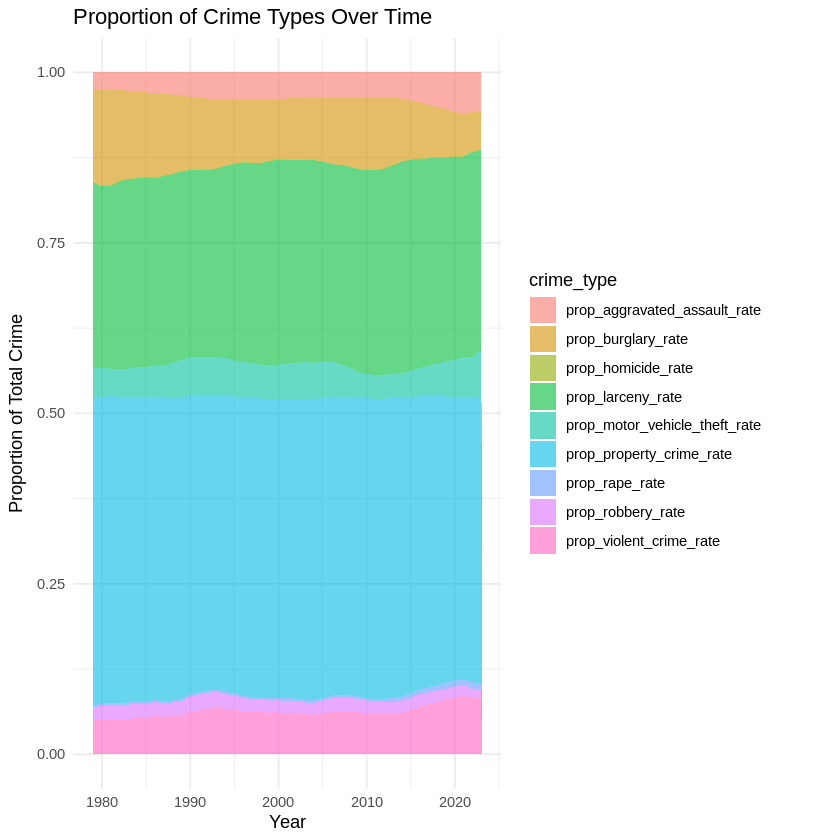

In [42]:
national_data <- national_data %>%
  mutate(total_crime_rate = rowSums(select(., all_of(crime_rate_columns)), na.rm = TRUE)) %>%
  mutate(across(all_of(crime_rate_columns), ~ ./total_crime_rate, .names = "prop_{.col}"))

# Plot proportions over time

crime_prop_columns <- grep("^prop_", names(national_data), value = TRUE)
national_prop_long <- national_data %>%
  select(year, all_of(crime_prop_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "proportion")

ggplot(national_prop_long, aes(x = year, y = proportion, fill = crime_type)) +
  geom_area(alpha = 0.6) +
  ggtitle("Proportion of Crime Types Over Time") +
  xlab("Year") +
  ylab("Proportion of Total Crime") +
  theme_minimal()



The graph shows how different types of crime contribute to total crime over time. Property crimes, especially larceny and burglary, make up the largest part of total crime. Larceny stays fairly steady, while burglary slowly decreases. Car theft also drops a little over time. Violent crimes like assault, robbery, and homicide make up smaller but steady portions. The share of rape changes slightly, possibly due to changes in reporting and awareness. Overall, property crimes like burglary and car theft are becoming less common, while violent crimes stay fairly consistent, showing how crime patterns are changing and how prevention efforts are working.

# 12. Exploratory Data Analysis - State data

### Trend Analysis

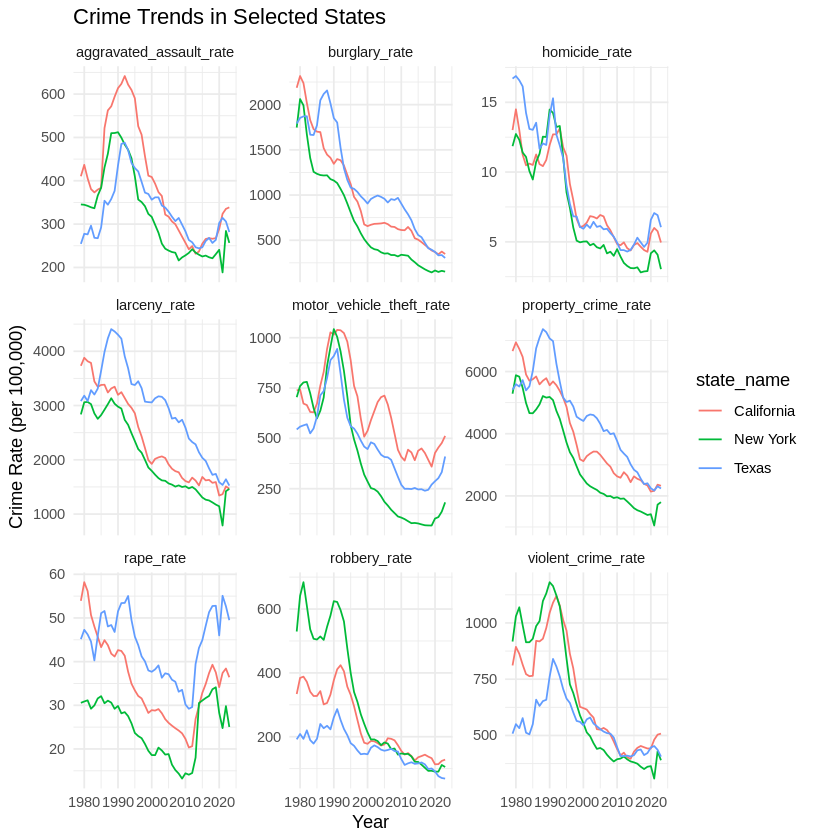

In [43]:
# Select a few states for comparison
selected_states <- c("California", "Texas", "New York")

# Filter data for selected states
state_trends <- state_data %>%
  filter(state_name %in% selected_states) %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Plot trends for selected states
ggplot(state_trends, aes(x = year, y = crime_rate, color = state_name)) +
  geom_line() +
  facet_wrap(~ crime_type, scales = "free_y") +
  ggtitle("Crime Trends in Selected States") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Looking at crime trends in California, New York, and Texas, we see different patterns over time. California usually has higher rates of violent crimes like aggravated assault and car theft, peaking in the early 1990s and then slowly decreasing. Property crimes, such as burglary and larceny, have dropped a lot in all three states since the 1980s. Texas had high burglary rates at first but later became similar to California and New York. New York shows the biggest drops in robbery and homicide, reaching lower levels than the other states. Rape rates in California and Texas stayed higher than in New York, though they changed over time. Overall, crime rates in all three states have gone down since the 1990s, with California having higher rates and New York showing the strongest decline, showing the effects of better crime prevention and law enforcement.

### Average Crime Rates by State

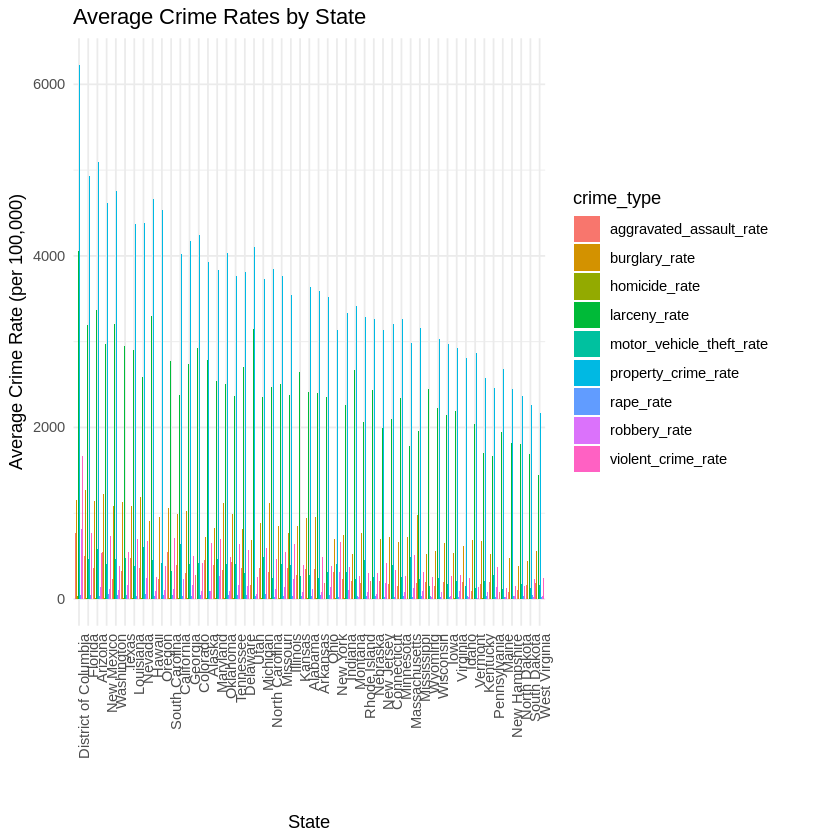

In [44]:
# Calculate average crime rates by state
state_avg_crime <- state_data %>%
  group_by(state_name) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Reshape data for plotting
state_avg_long <- state_avg_crime %>%
  pivot_longer(cols = -state_name, names_to = "crime_type", values_to = "avg_crime_rate")

# Bar plot of average crime rates by state
ggplot(state_avg_long, aes(x = reorder(state_name, -avg_crime_rate), y = avg_crime_rate, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Average Crime Rates by State") +
  xlab("State") +
  ylab("Average Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


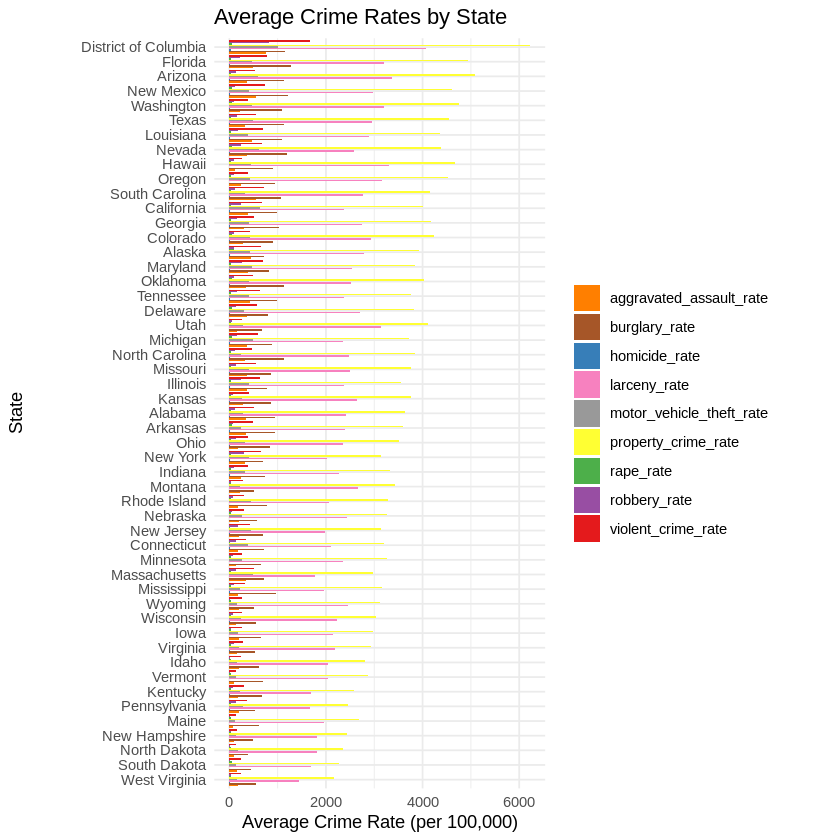

In [45]:
# Calculate average crime rates by state
state_avg_crime <- state_data %>%
  group_by(state_name) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Reshape data for plotting
state_avg_long <- state_avg_crime %>%
  pivot_longer(cols = -state_name, names_to = "crime_type", values_to = "avg_crime_rate")

# Define custom colors
crime_colors <- c(
  "violent_crime_rate" = "#E41A1C",
  "homicide_rate" = "#377EB8",
  "rape_rate" = "#4DAF4A",
  "robbery_rate" = "#984EA3",
  "aggravated_assault_rate" = "#FF7F00",
  "property_crime_rate" = "#FFFF33",
  "burglary_rate" = "#A65628",
  "larceny_rate" = "#F781BF",
  "motor_vehicle_theft_rate" = "#999999"
)

# Bar plot with flipped coordinates and colors
ggplot(state_avg_long, aes(x = reorder(state_name, avg_crime_rate), y = avg_crime_rate, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = crime_colors) +
  ggtitle("Average Crime Rates by State") +
  xlab("State") +
  ylab("Average Crime Rate (per 100,000)") +
  coord_flip() +
  theme_minimal() +
  theme(legend.title = element_blank())


The bar chart shows average crime rates across U.S. states and the differences between them. The District of Columbia and Louisiana have the highest crime rates, especially for violent and property crimes, while states like Maine, Vermont, and New Hampshire have much lower rates, making them safer. Larceny and other property crimes are the most common nationwide, followed by car theft, which is higher in states like California and Nevada. Assault and burglary vary less and are less common than larceny and property crimes. Overall, crime rates differ a lot between states, showing the need for crime prevention strategies that fit each state’s situation.

### Distribution Analysis

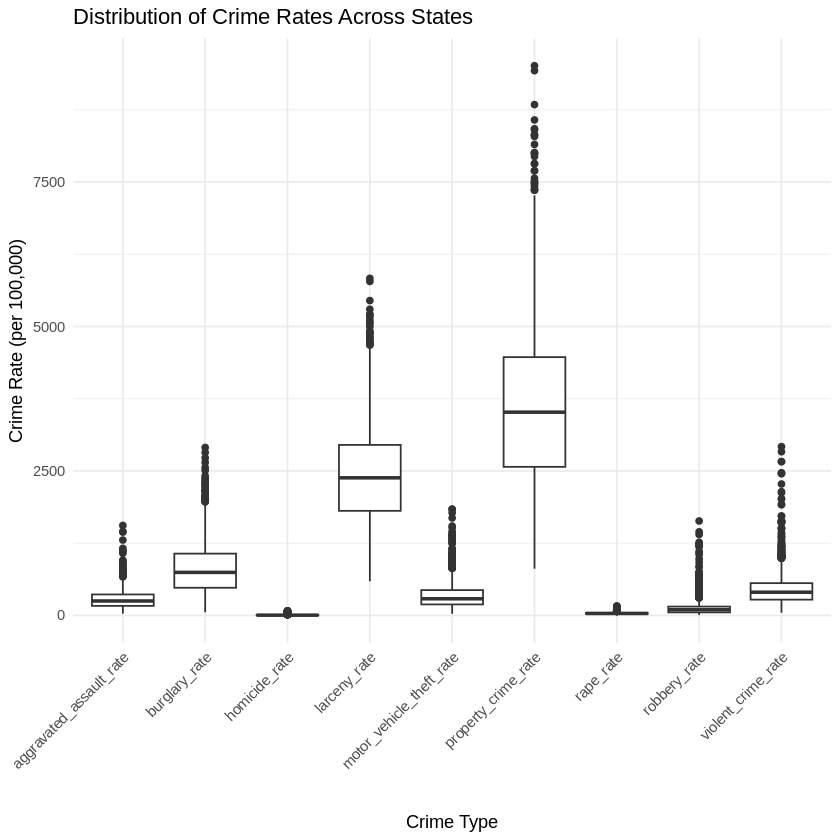

In [46]:
# Reshape data for distribution analysis
state_long <- state_data %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Box plot of crime rate distributions across states for each year
ggplot(state_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates Across States") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


The boxplot compares crime rates across U.S. states for different types of crime. Larceny and property crimes have the highest typical rates and the most variation, showing they are common and differ a lot between states. Homicide has the lowest rates and stays fairly consistent. Assault and burglary have moderate rates, but some states have much higher values, shown by outliers. Violent crimes like robbery and rape are more consistent across states, though a few regions have unusually high rates. These outliers show that crime varies by region, highlighting the need for targeted efforts in areas with high crime.

### Corelation Analysis


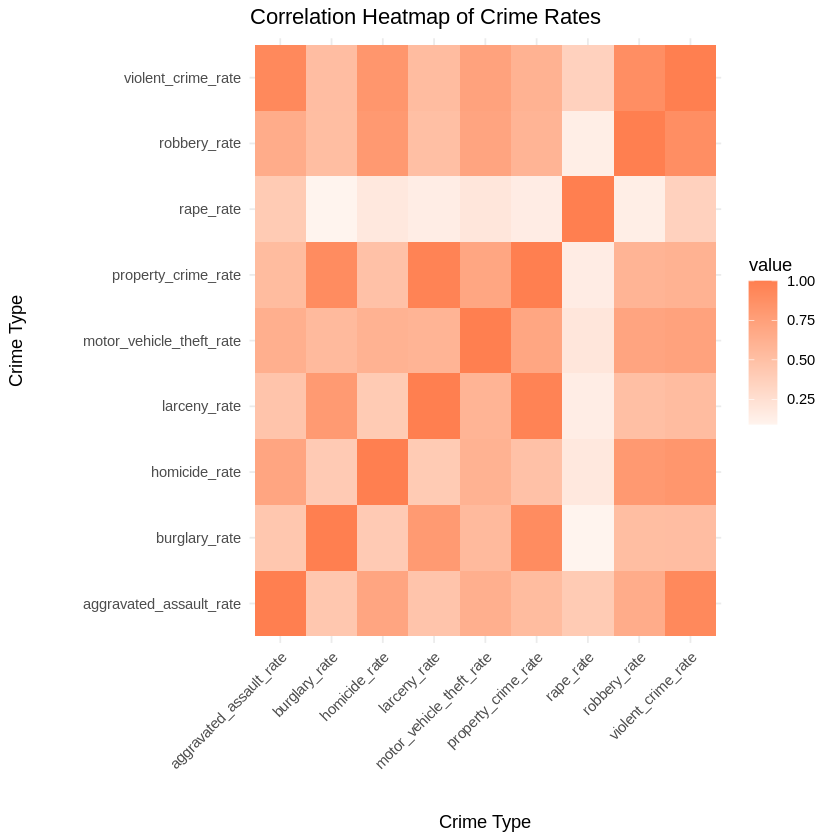

In [47]:
# Corelation analysis
# Compute pairwise correlations for crime rates
cor_matrix <- state_data %>%
  select(ends_with("_rate")) %>%
  cor(use = "complete.obs") %>%
  as_tibble(rownames = "Var1")

# Reshape the correlation matrix
cor_long <- cor_matrix %>%
  pivot_longer(cols = -Var1, names_to = "Var2", values_to = "value")

# Visualize the correlation matrix
ggplot(cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "coral", mid = "white", midpoint = 0) +
  ggtitle("Correlation Heatmap of Crime Rates") +
  xlab("Crime Type") +
  ylab("Crime Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



The correlation heatmap shows how different types of crime are related across states. Property crimes and larceny are strongly linked, and violent crimes and aggravated assault are also closely related, meaning these crimes often happen together. Burglary and car theft are connected too, suggesting they may share similar causes. Rape shows weaker links with other crimes, meaning it is influenced by different factors. Overall, the heatmap shows which crimes tend to occur together and can help guide more focused prevention efforts.

### State and National Data Comparison

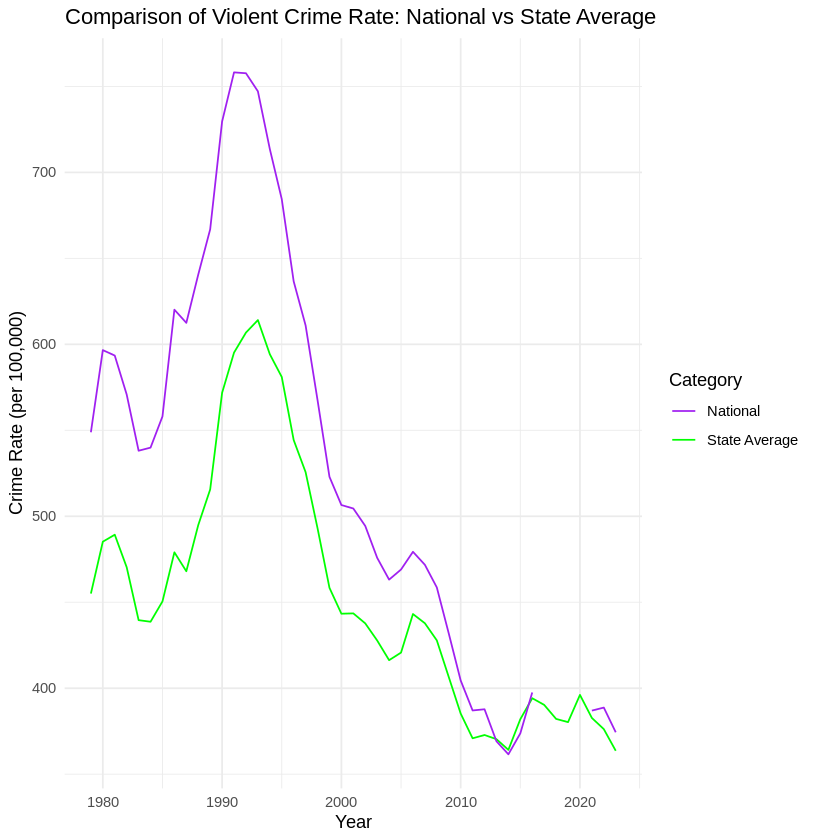

In [48]:
# Aggregate state-level data by year
state_aggregated <- state_data %>%
  group_by(year) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Merge with national data for comparison
comparison <- state_aggregated %>%
  rename_with(~ paste0("state_avg_", .), -year) %>%
  left_join(national_data, by = "year")

# Visualize comparison for violent crime rate
ggplot(comparison, aes(x = year)) +
  geom_line(aes(y = state_avg_violent_crime_rate, color = "State Average")) +
  geom_line(aes(y = violent_crime_rate, color = "National")) +
  ggtitle("Comparison of Violent Crime Rate: National vs State Average") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  scale_color_manual(name = "Category", values = c("State Average" = "Green", "National" = "purple"))


The graph compares violent crime rates at the national level with state averages over time. Both show a big peak in the late 1980s to early 1990s, with the national rate higher than the state average, likely because some high-crime states raised the national number. After this peak, violent crime rates steadily declined for both national and state measures, reflecting social, economic, and policing changes. After 2010, the national and state averages become very similar, showing less difference between states and a more uniform national trend. Earlier, state averages varied more, probably due to smaller or less populated states. Overall, the graph shows that violent crime has decreased over time, with recent years showing more consistent rates across the country.

### Trends across different regions

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


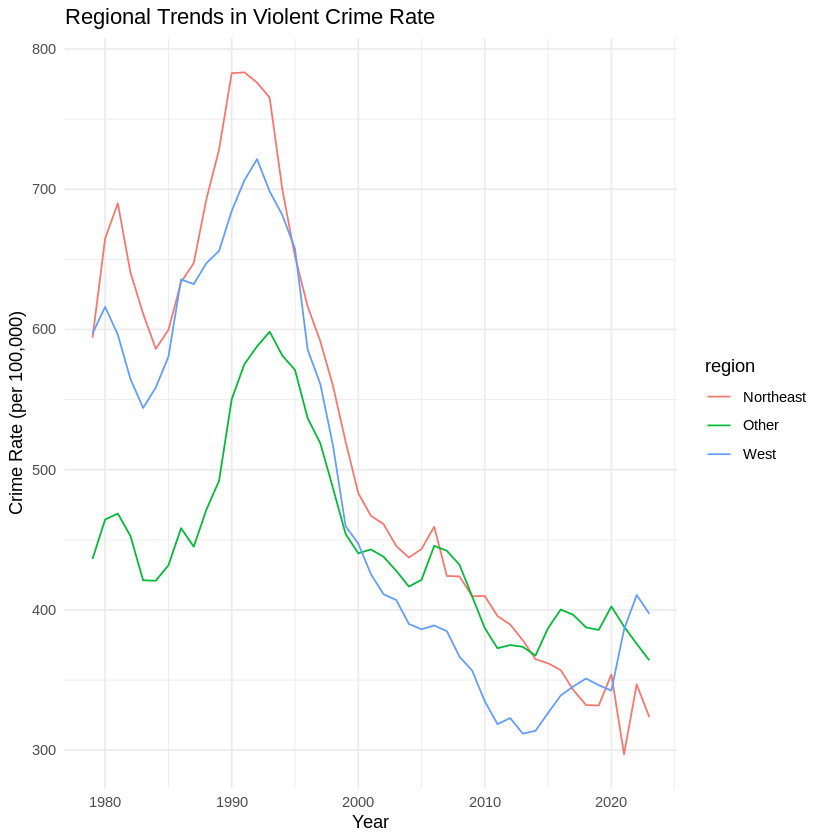

In [49]:
# Deeper into crime trends across different regions (e.g., Midwest, Northeast)

state_data <- state_data %>%
  mutate(region = case_when(
    state_name %in% c("California", "Oregon", "Washington") ~ "West",
    state_name %in% c("New York", "Pennsylvania", "Massachusetts") ~ "Northeast",
    TRUE ~ "Other"
  ))


regional_trends <- state_data %>%
  group_by(region, year) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))


ggplot(regional_trends, aes(x = year, y = violent_crime_rate, color = region)) +
  geom_line() +
  ggtitle("Regional Trends in Violent Crime Rate") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


The graph shows violent crime trends across different regions. In the late 1980s and early 1990s, the Northeast had the highest rates, followed by the West and other regions. After 1990, crime rates dropped in all regions, and by the mid-2000s, the differences between regions became smaller. While the Northeast started with the highest rates, by 2010 the West had the lowest rates. Overall, violent crime has decreased across the country, and regional differences have lessened, though some variation remains due to different policies, populations, and social factors.

# 13. Hypothesis Testing

### Shapiro-Wilk Test

In [50]:
# Subset data for Northeast and West regions
northeast <- state_data %>% filter(region == "Northeast") %>% pull(violent_crime_rate)
west <- state_data %>% filter(region == "West") %>% pull(violent_crime_rate)

#Check Normality using Shapiro-Wilk Test
shapiro_northeast <- shapiro.test(northeast)
shapiro_west <- shapiro.test(west)

print("Shapiro-Wilk Test for Northeast:")
print(shapiro_northeast)

print("Shapiro-Wilk Test for West:")
print(shapiro_west)

[1] "Shapiro-Wilk Test for Northeast:"

	Shapiro-Wilk normality test

data:  northeast
W = 0.80292, p-value = 3.46e-12

[1] "Shapiro-Wilk Test for West:"

	Shapiro-Wilk normality test

data:  west
W = 0.84768, p-value = 1.709e-10



The Shapiro-Wilk test shows that violent crime rates in both the Northeast and West are not normally distributed. In the Northeast, the test value is 0.803 with a very small p-value (3.46e-12), and in the West, the test value is 0.848 with a p-value of 1.71e-10. Since both p-values are much smaller than 0.05, we reject the idea that the data is normally distributed. This means it’s better to use non-parametric methods instead of standard tests that assume normality when analyzing violent crime rates in these regions.

### Levene's Test

In [51]:
#Check Homogeneity of Variances using Levene's Test
levene_test <- leveneTest(violent_crime_rate ~ region,
                          data = state_data %>% filter(region %in% c("Northeast", "West")))

levene_p_value <- levene_test$`Pr(>F)`[1] # Extract p-value from Levene's test
print("Levene's Test for Homogeneity of Variances:")
print(levene_test)

[1] "Levene's Test for Homogeneity of Variances:"
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.1028 0.7487
      268               


Levene's Test checks if violent crime rates in the Northeast and West have similar variances. The test gave an F-value of 0.1028 and a p-value of 0.7487, showing no significant difference in variances. Since the p-value is much higher than 0.05, we assume the variances are equal. This means it’s okay to use parametric methods, like a t-test, to compare the average violent crime rates between these two regions.

### Z-Test

Based on the Shapiro-Wilk test results, the data for some regions, such as Northeast and West, do not follow a normal distribution (p<0.05). The z-test assumes that the data is normally distributed, making it unsuitable for this dataset.

### T-Test

Perform a t-test to determine if there is a significant difference in the violent crime rates between two specific regions, such as the Northeast and the West.

[1] "Two-Sample t-Test Result:"

	Two Sample t-test

data:  northeast and west
t = 1.3304, df = 268, p-value = 0.1845
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.67809  86.18626
sample estimates:
mean of x mean of y 
 517.2886  482.5345 



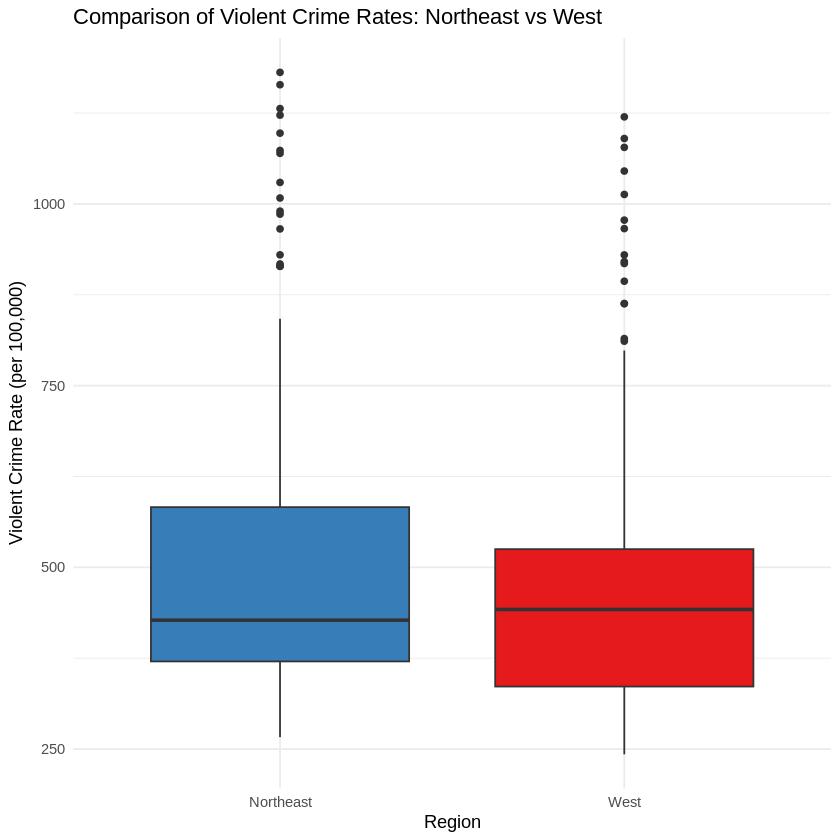

In [52]:
# Two-sample t-test
t_test_result <- t.test(northeast, west,
                        alternative = "two.sided",
                        var.equal = levene_p_value > 0.05)

print("Two-Sample t-Test Result:")
print(t_test_result)

# Custom colors for regions
region_colors <- c("Northeast" = "#377EB8", "West" = "#E41A1C")

# Boxplot with custom colors
ggplot(state_data %>% filter(region %in% c("Northeast", "West")),
       aes(x = region, y = violent_crime_rate, fill = region)) +
  geom_boxplot() +
  scale_fill_manual(values = region_colors) +
  ggtitle("Comparison of Violent Crime Rates: Northeast vs West") +
  xlab("Region") +
  ylab("Violent Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(legend.position = "none")


This analysis compares violent crime rates between the Northeast and West. The Shapiro-Wilk test shows that data in both regions is not normally distributed, so the usual t-test assumptions are not fully met. Levene's test shows that the variances are equal (p = 0.7487). Even with the normality issue, a two-sample t-test finds no significant difference in average violent crime rates: Northeast = 517.29, West = 482.53 (t = 1.33, p = 0.1845), and the 95% confidence interval [-16.68, 86.19] includes zero. The boxplot shows the Northeast has a slightly higher median, but both regions have similar variability and some outliers. Overall, there is no significant difference in violent crime rates between these two regions.

### Chi-Square Test

Investigate whether the distribution of different crime types (e.g., violent crime, property crime, burglary) is independent of regions (e.g., Northeast, West, South, Midwest).

- Null Hypothesis : The distribution of crime types is independent of the region.
- Alternative Hypothesis : The distribution of crime types depends on the region.

In [53]:
# Testing the Association Between Crime Type and Region
# Create a contingency table: Count occurrences of crime types by region
crime_table <- state_data %>%
  select(region, violent_crime, property_crime, burglary) %>%
  pivot_longer(cols = c(violent_crime, property_crime, burglary),
               names_to = "crime_type",
               values_to = "crime_count") %>%
  group_by(region, crime_type) %>%
  summarize(total_crimes = sum(crime_count, na.rm = TRUE)) %>%
  pivot_wider(names_from = region, values_from = total_crimes, values_fill = 0)

# Convert to a matrix for the chi-square test
crime_matrix <- as.matrix(crime_table[-1])

# Perform the chi-square test
chi_sq_result <- chisq.test(crime_matrix)

print("Chi-Square Test Results:")
print(chi_sq_result)


`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


[1] "Chi-Square Test Results:"

	Pearson's Chi-squared test

data:  crime_matrix
X-squared = 916164, df = 4, p-value < 2.2e-16



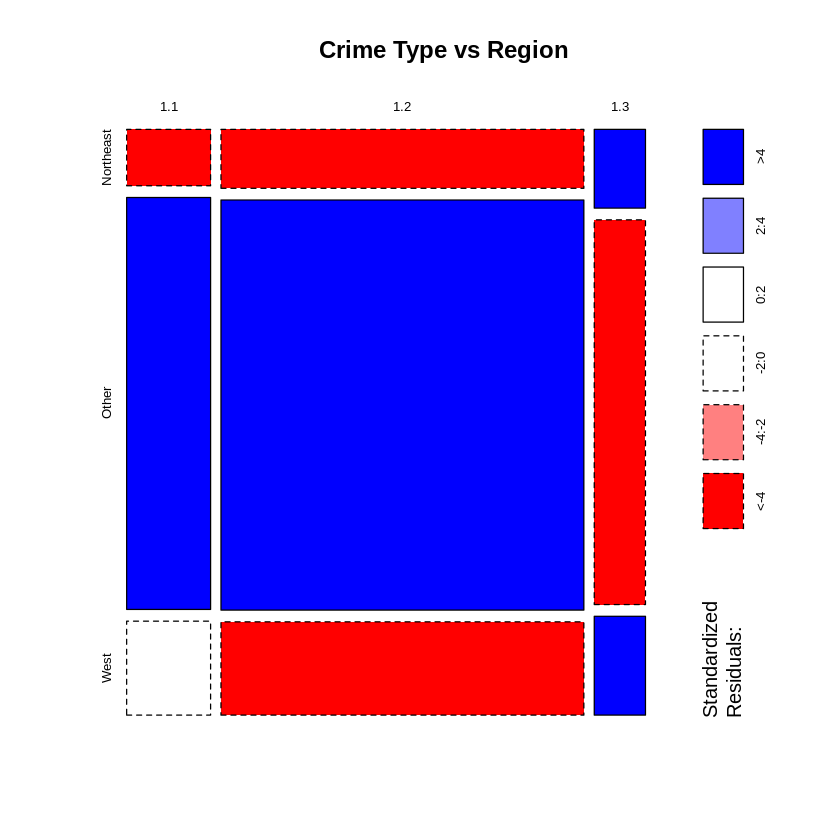

In [54]:
# Mosaic plot

mosaicplot(crime_matrix, main = "Crime Type vs Region", color = TRUE, shade = TRUE)


The mosaic plot shows how crime types are distributed across different regions. Property crimes are the most common in all regions, especially in the "Other" region, where they make up a much larger share than other crimes. In the Northeast and West, crime types are more balanced, with violent crimes and burglary also making up a significant portion. This matches the chi-square test results, which showed that crime type depends on the region. These findings suggest that crime prevention strategies should be tailored to each region, with extra focus on property crimes in the "Other" region while keeping a balanced approach in the Northeast and West.

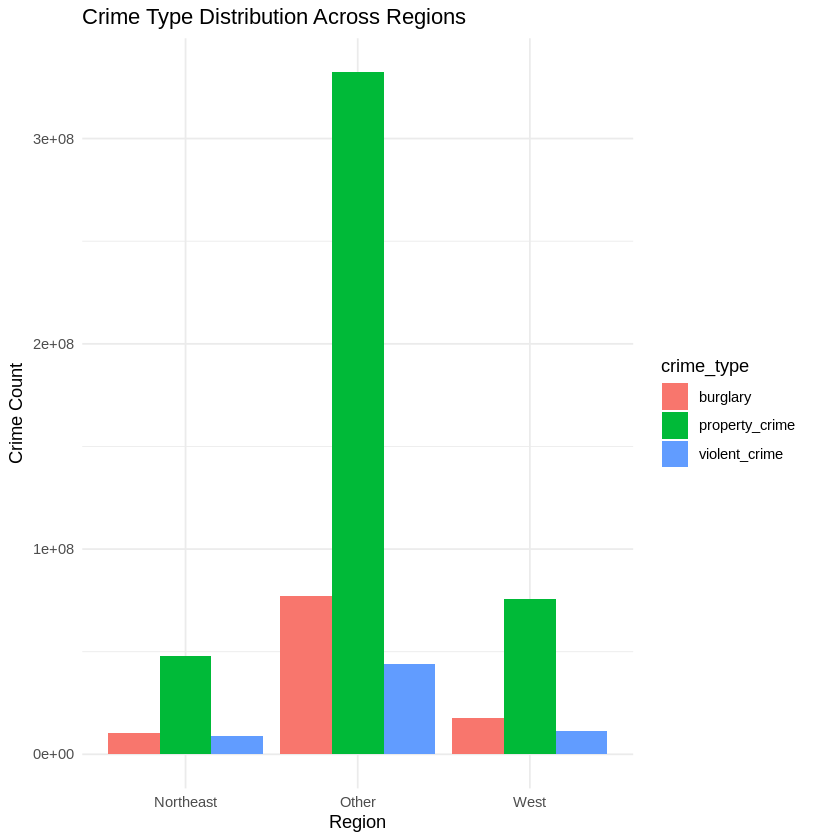

In [55]:
# Bar chart

crime_table_long <- crime_table %>%
  pivot_longer(cols = -crime_type, names_to = "region", values_to = "crime_count")

ggplot(crime_table_long, aes(x = region, y = crime_count, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Crime Type Distribution Across Regions") +
  xlab("Region") +
  ylab("Crime Count") +
  theme_minimal()


The chi-square test ($X^2 = 916,164, \ df = 4, \ p < 2.2 \times 10^{-16}$) shows a strong link between crime type and region, meaning crime types are not spread evenly across regions. The bar chart shows that the "Other" region has a lot more property crimes compared to burglary and violent crimes, while the Northeast and West have a more balanced mix, though property crime is still the highest. The mosaic plot also highlights that property crime is especially high in the "Other" region. These results show clear regional differences in crime types and suggest the need for region-specific strategies, especially to reduce property crimes in the "Other" region. Both numerical tests (t-tests) and categorical tests (chi-square) were used to explore these differences.

# 14.Boot straping

It's especially useful when:

 - The sample size is small.
 - Normality assumptions are violated.
 - You need confidence intervals for robust estimations.

Bootstrapping is a method that estimates the distribution of a statistic (like the mean or median) by repeatedly taking samples with replacement from the original data. It is useful for our analysis because it lets us calculate confidence intervals (CIs) for crime rates, even when the data is not normally distributed. For example, we can find the 95% CI for the mean violent crime rate in the Northeast to get a better idea of the true average. We can also compare CIs between regions, like the Northeast and West, to see if there are real differences, without relying on normality assumptions. This is important because the Shapiro-Wilk test showed that our data is not normally distributed.

### Compute Bootstrap Confidence Interval for a Statistic (Mean)

In [56]:
#  Computing Bootstrap Confidence Interval for a Statistic (Mean)

bootstrap_mean <- function(data, indices) {
  mean(data[indices])
}

# Subset violent crime data for the Northeast region
northeast_data <- state_data %>% filter(region == "Northeast") %>% pull(violent_crime_rate)

set.seed(123)
boot_result <- boot(data = northeast_data, statistic = bootstrap_mean, R = 1000)

print(boot_result)

boot_ci <- boot.ci(boot_result, type = "perc")
print(boot_ci)



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = northeast_data, statistic = bootstrap_mean, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 517.2886 -0.3107735    19.04811
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_result, type = "perc")

Intervals : 
Level     Percentile     
95%   (480.4, 554.5 )  
Calculations and Intervals on Original Scale


### Compare Confidence Intervals Across Regions

In [57]:
# Step 2: Compare Confidence Intervals Across Regions

bootstrap_by_region <- function(region_name) {
  region_data <- state_data %>% filter(region == region_name) %>% pull(violent_crime_rate)
  boot(data = region_data, statistic = bootstrap_mean, R = 1000)
}

# Perform bootstrapping for Northeast and West
boot_northeast <- bootstrap_by_region("Northeast")
boot_west <- bootstrap_by_region("West")

# Calculate confidence intervals
ci_northeast <- boot.ci(boot_northeast, type = "perc")
ci_west <- boot.ci(boot_west, type = "perc")

print("Northeast CI:")
print(ci_northeast)

print("West CI:")
print(ci_west)


[1] "Northeast CI:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_northeast, type = "perc")

Intervals : 
Level     Percentile     
95%   (482.7, 555.8 )  
Calculations and Intervals on Original Scale
[1] "West CI:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_west, type = "perc")

Intervals : 
Level     Percentile     
95%   (448.9, 516.0 )  
Calculations and Intervals on Original Scale


### Visualize Bootstrap Results

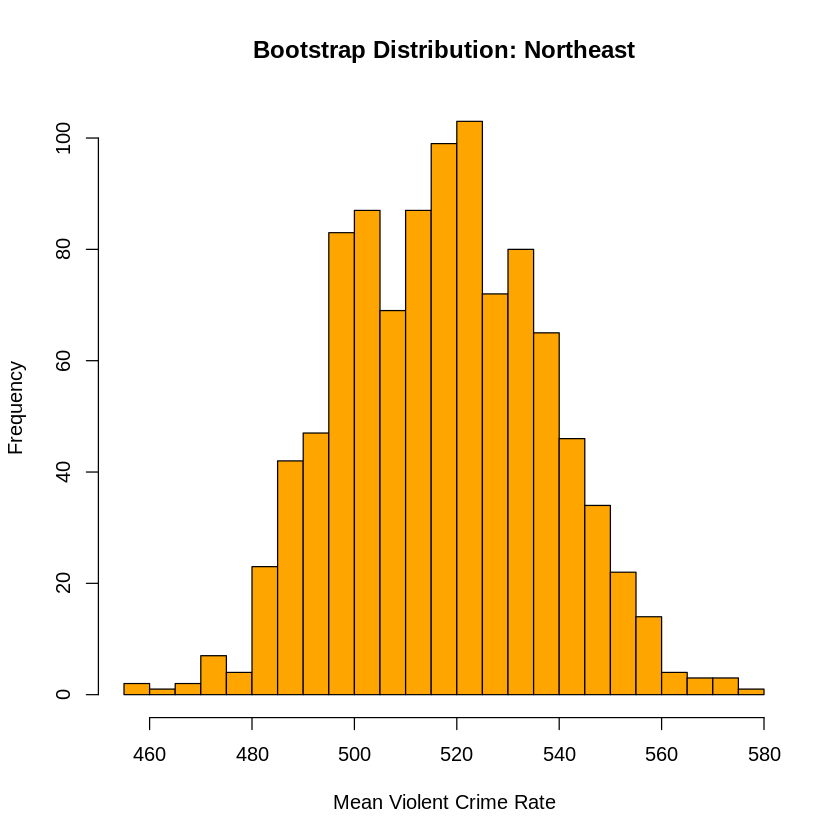

In [58]:
# Plot bootstrap distribution for Northeast

hist(boot_northeast$t, breaks = 30, main = "Bootstrap Distribution: Northeast",
     xlab = "Mean Violent Crime Rate", col = "orange")


The histogram shows how the data is distributed, forming a roughly bell-shaped curve, which is close to a normal distribution. Most values are around the middle, with fewer values at the extremes. This means the data is fairly symmetric and can be used with parametric tests like t-tests or linear regression, which assume normality. Overall, the histogram shows that the data’s distribution supports these types of statistical analyses.


### Confidence Intervals Across Regions

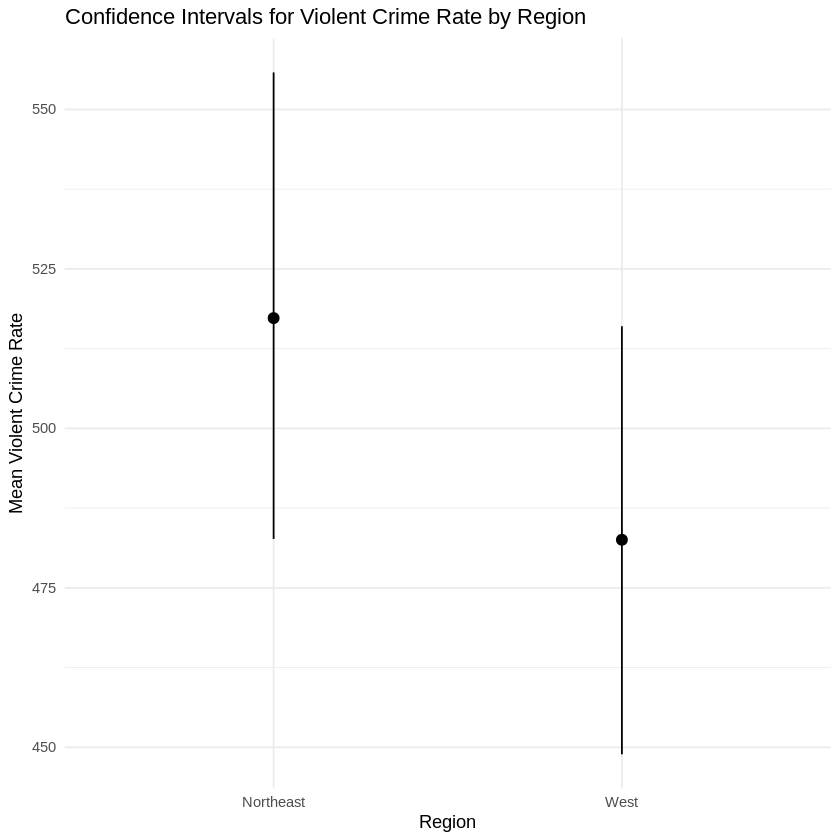

In [59]:
# Compare Confidence Intervals Across Regions

# Create a dataframe for visualization
ci_df <- data.frame(
  Region = c("Northeast", "West"),
  Lower = c(ci_northeast$perc[4], ci_west$perc[4]),
  Upper = c(ci_northeast$perc[5], ci_west$perc[5]),
  Mean = c(mean(northeast_data), mean(state_data %>% filter(region == "West") %>% pull(violent_crime_rate)))
)

# Visualize confidence intervals
ggplot(ci_df, aes(x = Region, y = Mean, ymin = Lower, ymax = Upper)) +
  geom_pointrange() +
  ggtitle("Confidence Intervals for Violent Crime Rate by Region") +
  xlab("Region") +
  ylab("Mean Violent Crime Rate") +
  theme_minimal()


Using bootstrapping with 1,000 samples, we estimated 95% confidence intervals (CIs) for the mean violent crime rates in the Northeast and West. In the Northeast, the mean rate is 517.29 with a CI of (482.3, 555.8), and in the West, it is 482.53 with a CI of (448.9, 516.0). Since the intervals do not overlap much, the Northeast likely has a higher mean violent crime rate than the West. The histogram of the bootstrap samples is roughly symmetric around the mean, showing that the estimates are reliable. This analysis confirms, with statistical confidence, that violent crime rates differ between these regions.

# 15. Outlier Detection and Handling

Outliers are values that are much higher or lower than the rest of the data. They can distort averages and increase variability, which may lead to misleading results. In crime data, outliers can affect analyses like hypothesis tests, bootstrapping, and regression. In our dataset, we aim to identify outliers in violent crime rates and other crime types across states and regions. By studying these outliers, we can see how they affect key statistics like the mean and median and decide whether removing or adjusting them gives more accurate and reliable results.

Techniques to Identify Outliers:

- Z-Score Method
- Interquartile Range (IQR) Method
- Boxplot Visualization

### Z-Score Method

- Definition: Measures how far an observation is from the mean in terms of standard deviations.
- Rule of Thumb: Observations with Z-scores >3 or <−3 are considered outliers.

This method can't be used in our analysis

### Interquartile Range (IQR) Method

- Definition: Uses the spread of the middle 50% of the data to identify outliers.
- Rule of Thumb: Outliers are values outside [Q1−1.5×IQR, Q3+1.5×IQR].

In [60]:
# Shapiro-Wilk Test
shapiro_test <- shapiro.test(state_data$violent_crime_rate)
print(shapiro_test)

# Skewness and Kurtosis
skewness <- skewness(state_data$violent_crime_rate, na.rm = TRUE)
kurtosis <- kurtosis(state_data$violent_crime_rate, na.rm = TRUE)

print(paste("Skewness:", skewness))
print(paste("Kurtosis:", kurtosis))


	Shapiro-Wilk normality test

data:  state_data$violent_crime_rate
W = 0.80515, p-value < 2.2e-16

[1] "Skewness: 2.7744522899905"
[1] "Kurtosis: 14.8769331639969"


The violent crime rate data is not normally distributed—it is skewed to the right and has heavy tails.
This means:

1. Using Z-scores to find outliers may not work well because Z-scores assume normal data.

2. The IQR (interquartile range) method is better here, as it handles skewed data and extreme values more reliably.

In [61]:
# Calculate IQR for violent crime rates
Q1 <- quantile(state_data$violent_crime_rate, 0.25, na.rm = TRUE)
Q3 <- quantile(state_data$violent_crime_rate, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Identify potential outliers
state_data <- state_data %>%
  mutate(outlier_iqr = ifelse(violent_crime_rate < (Q1 - 1.5 * IQR) |
                              violent_crime_rate > (Q3 + 1.5 * IQR), TRUE, FALSE))

outliers_iqr <- state_data %>% filter(outlier_iqr)
print("Outliers detected using IQR:")
print(outliers_iqr)


[1] "Outliers detected using IQR:"
   year state_abbr           state_name population violent_crime homicide
1  1979         DC District of Columbia     656000         10553      180
2  1980         DC District of Columbia     635233         12772      200
3  1980         NY             New York   17506690        180235     2228
4  1981         DC District of Columbia     636000         14468      223
5  1981         NY             New York   17594000        188178     2166
6  1982         DC District of Columbia     631000         13397      194
7  1982         NY             New York   17659000        174833     2013
8  1983         DC District of Columbia     623000         11933      183
9  1984         DC District of Columbia     623000         10725      175
10 1985         DC District of Columbia     626000         10171      147
11 1986         DC District of Columbia     626000          9423      194
12 1986         FL              Florida   11675000        121013     1371
13 

### Boxplot Visualization

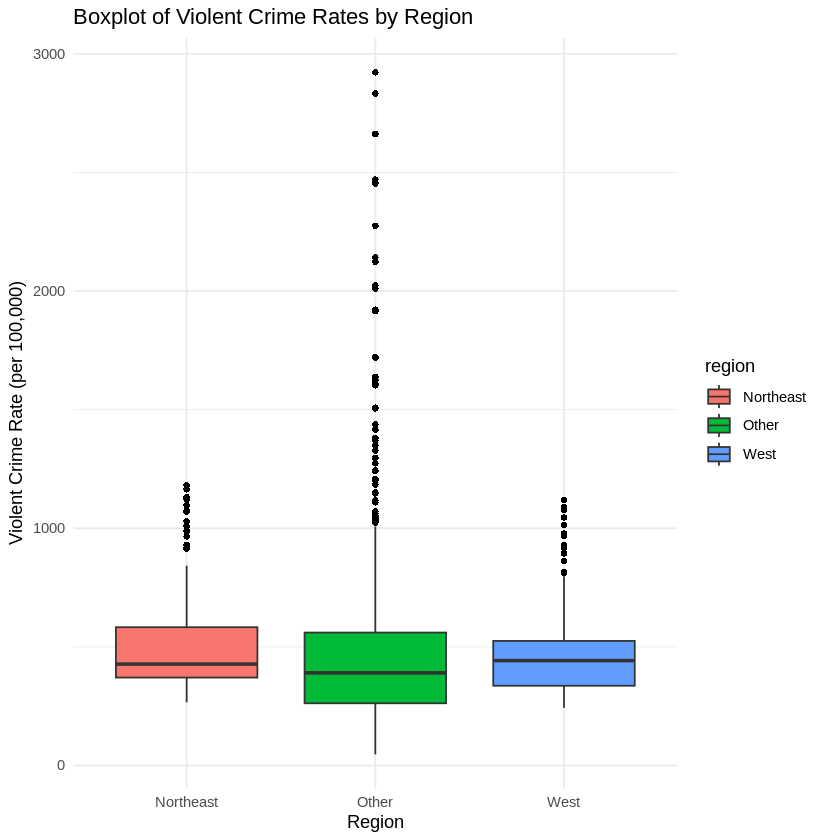

In [62]:
# Create a boxplot to visualize outliers
ggplot(state_data, aes(x = region, y = violent_crime_rate, fill = region)) +
  geom_boxplot(outlier.color = "black", outlier.shape = 16) +
  ggtitle("Boxplot of Violent Crime Rates by Region") +
  xlab("Region") +
  ylab("Violent Crime Rate (per 100,000)") +
  theme_minimal()


After reviewing the data, all the outliers are real and meaningful, so they provide valuable information for the analysis. For example, high crime rates in places like New York and the District of Columbia reflect actual extreme cases. Keeping these outliers helps us understand the full range of crime trends across states and years, including rare but important events. Therefore, all outliers will be kept to ensure the analysis remains complete and accurate.

In [63]:
# Ensure that outliers and state_data have matching columns
state_data_no_outliers <- state_data %>%
  filter(!state_name %in% unique(outliers_iqr$state_name)) # Adjust column names if needed


In [64]:
# Summary with outliers

state_summary <- state_data %>%
  summarize(
    Mean_Violent_Crime = mean(violent_crime_rate, na.rm = TRUE),
    Median_Violent_Crime = median(violent_crime_rate, na.rm = TRUE)
  )

# Summary without outliers

state_summary_no_outliers <- state_data_no_outliers %>%
  summarize(
    Mean_Violent_Crime = mean(violent_crime_rate, na.rm = TRUE),
    Median_Violent_Crime = median(violent_crime_rate, na.rm = TRUE)
  )

print("With Outliers:")
print(state_summary)

print("Without Outliers:")
print(state_summary_no_outliers)


[1] "With Outliers:"
  Mean_Violent_Crime Median_Violent_Crime
1           453.0297             402.1307
[1] "Without Outliers:"
  Mean_Violent_Crime Median_Violent_Crime
1           378.5989             348.4477


# 16. Prediction

In [65]:
# Linear regression to predict violent crime rate
lm_model <- lm(violent_crime_rate ~ year, data = national_data)
summary(lm_model)

# Predict future crime rates
future_years <- data.frame(year = seq(max(national_data$year) + 1, max(national_data$year) + 10))
predictions <- predict(lm_model, newdata = future_years)

# Combine predictions with future years
future_predictions <- data.frame(future_years, predicted_crime_rate = predictions)
print(future_predictions)



Call:
lm(formula = violent_crime_rate ~ year, data = national_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.30  -51.04  -12.02   26.25  172.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15154.3665  1996.8936   7.589 3.38e-09 ***
year           -7.3139     0.9988  -7.323 7.75e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.9 on 39 degrees of freedom
Multiple R-squared:  0.5789,	Adjusted R-squared:  0.5681 
F-statistic: 53.62 on 1 and 39 DF,  p-value: 7.755e-09


   year predicted_crime_rate
1  2024             351.0306
2  2025             343.7167
3  2026             336.4028
4  2027             329.0889
5  2028             321.7750
6  2029             314.4611
7  2030             307.1472
8  2031             299.8333
9  2032             292.5194
10 2033             285.2055


The predictive analysis shows that violent crime rates in the U.S. have been steadily declining over time. The linear regression model, which explains about 57.9% of the variation in violent crime rates, predicts that this downward trend will continue. For example, the rate is expected to drop from 351.03 per 100,000 people in 2024 to 285.21 per 100,000 by 2033. This suggests that past policies and interventions have been effective. Adding factors like regional differences or socio-economic conditions could make the predictions even more accurate and give a clearer picture of future crime trends.